In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

from scipy import stats
import researchpy as rp

https://github.com/Opensourcefordatascience/Data-sets/blob/master/blood_pressure.csv

In this dataset fictitious and contains blood pressure readings before and after an intervention. These are variables “bp_before” and “bp_after”.

In [2]:
bp_reading = pd.read_csv('blood_pressure.csv')

In [3]:
bp_reading.sample(10)

,patient,sex,agegrp,bp_before,bp_after
43,44,Male,60+,160,159
104,105,Female,60+,162,138
47,48,Male,60+,157,148
19,20,Male,30-45,162,150
98,99,Female,46-59,145,137
12,13,Male,30-45,165,135
20,21,Male,46-59,149,168
32,33,Male,46-59,167,175
39,40,Male,46-59,160,174
112,113,Female,60+,148,159


In [4]:
bp_reading.shape

(120, 5)

In [5]:
bp_reading.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


<AxesSubplot:>

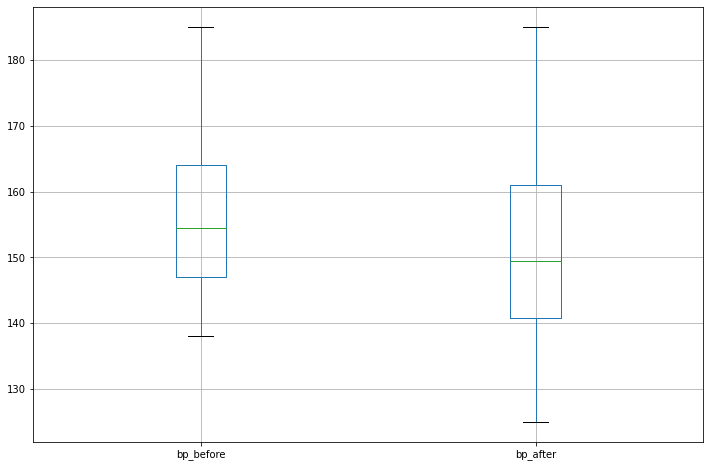

In [6]:
bp_reading[['bp_before', 'bp_after']].boxplot(figsize=(12, 8))

## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, which translates to the mean of sample 01 is equal to the mean of sample 02__
* __Alternative hypothesis (H1): u1 ? u2, which translates to the means of sample 01 is not equal to sample 02__ 

## Assumption check 

* The samples are independently and randomly drawn
* The distribution of the residuals between the two groups should follow the normal distribution
* The variances between the two groups are equal

In [7]:
stats.levene(bp_reading['bp_after'], bp_reading['bp_before'])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

In [10]:
bp_reading['bp_diff'] = scale(bp_reading['bp_after'] - bp_reading['bp_before'])

In [11]:
bp_reading[['bp_diff']].head()

,bp_diff
0,0.906743
1,0.726496
2,1.207155
3,-0.354987
4,0.005508


array([[<AxesSubplot:title={'center':'bp_diff'}>]], dtype=object)

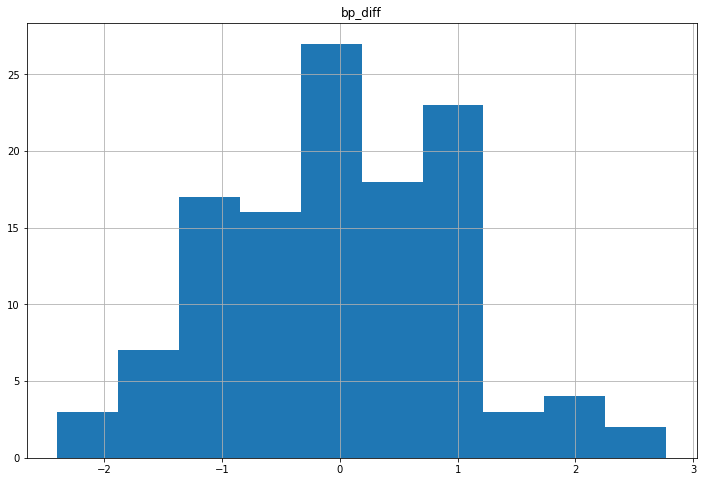

In [12]:
bp_reading[['bp_diff']].hist(figsize=(12, 8))

### Checking Normal distribution by Q-Q plot graph
https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

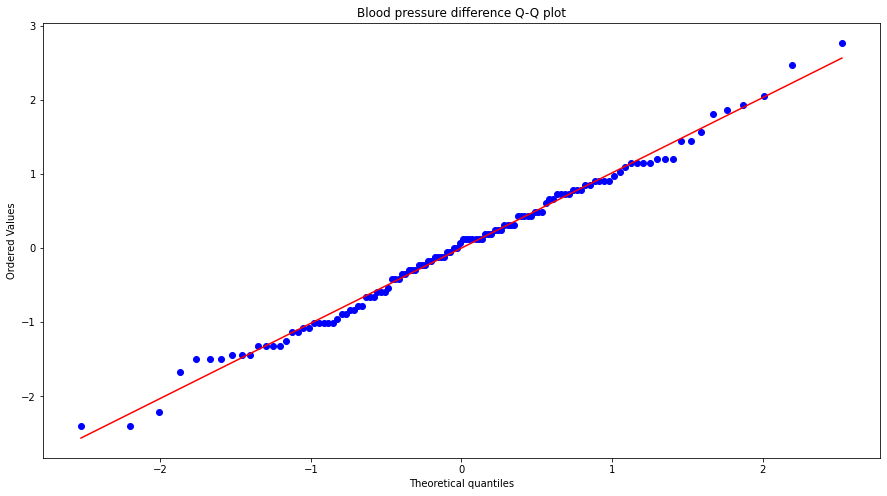

In [13]:
plt.figure(figsize=(15, 8))
stats.probplot(bp_reading['bp_diff'], plot=plt)

plt.title('Blood pressure difference Q-Q plot')
plt.show()

**Note:-** The corresponding points are lies very close to line that means are our sample data sets are normally distributed

### Checking Normal distribution by method of `Shapiro stats`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [14]:
stats.shapiro(bp_reading['bp_diff'])

ShapiroResult(statistic=0.9926842451095581, pvalue=0.7841846942901611)

In [15]:
stats.ttest_rel(bp_reading['bp_after'], bp_reading['bp_before'])

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

**Note:-** __Here, `t-test = -3.337` and `p-value = 0.0011` since p-value is less than the significant value hence null-hypothesis is rejected`(Alpha = 0.05)`__

### T-test using `researchpy`
https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [16]:
rp.ttest(bp_reading['bp_after'], bp_reading['bp_before'], 
         paired = True, equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,W value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000
